# Is the Grass Wet?

This is an example used by Pearl in his book 'Causality'. I've used the conditional probability tables from here:

https://en.wikipedia.org/wiki/Bayesian_network



In [1]:
from causalinfo import *
# You only need this if you want to draw pretty pictures of the Networksa
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

We begin with some variables, each with 2 states ...

In [2]:
rain = Variable('Rain', 2)
sprinkler = Variable('Sprinkler', 2)
grass = Variable('Grass', 2)

We now need some equations to link these (these are our conditional probability distributions).

In [3]:
def rain_to_sprinkler(r, dist):
    table = [.6, .4], [.99, .01]
    dist[:] = table[r]

In [4]:
eq1 = Equation('RtoS', [rain], [sprinkler], rain_to_sprinkler)
eq1

In [5]:
def rain_and_sprinkler_to_grass(s, r, dist):
    actual = [[1.0, 0.0], [0.2, 0.8]], [[0.1, 0.9], [0.01, 0.99]]
    dist[:] = actual[s][r]

In [6]:
eq2 = Equation('SRtoG', [sprinkler, rain], [grass], rain_and_sprinkler_to_grass)
eq2

We now construct a causal graph from these...

In [7]:
gr = CausalGraph([eq1, eq2])

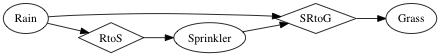

In [8]:
draw(gr.full_network)

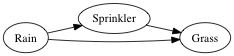

In [9]:
draw(gr.causal_network)

The only root variable in this equation is rain. So let's supply a distribution over this.

In [10]:
rain_dist = JointDist({rain: [.8, .2]})
rain_dist

,Pr
Rain,
0,0.8
1,0.2


With the graph and the rain probabilities, we can generate the full joint probability distribution.

In [11]:
joint = gr.generate_joint(rain_dist)
joint

We can query this distribution for specific probabilities...

In [12]:
joint.query_probability('Grass==1 and Sprinkler==1')

0.28998

We can also generate a joint distribution *under intervention*. Let's generate a distribution over the sprinkler, telling is that it is ON

In [13]:
sprinkler_on_dist = JointDistByState({sprinkler:1})
sprinkler_on_dist

,Pr
Sprinkler,
0,0
1,1


In [16]:
joint_sprinkler_on = gr.generate_joint(rain_dist, sprinkler_on_dist)
joint_sprinkler_on

This isn't the same as above!

Let's just ask about the grass in this case...

In [17]:
joint_sprinkler_on.joint(grass)

,Pr
Grass,
0,0.082
1,0.918
